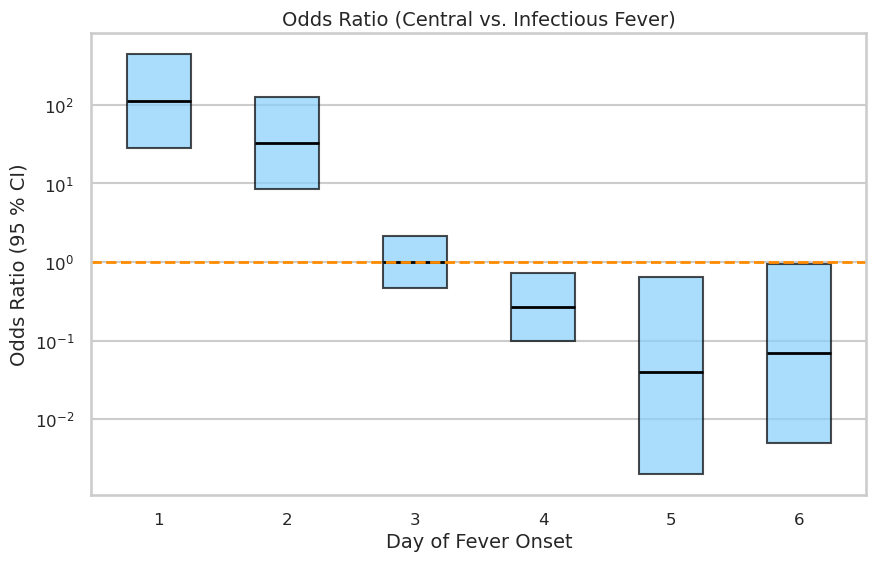

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Read the CSV file
df = pd.read_csv("OR_boxplot_edited.csv", delimiter=",")

# Convert columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

fig, ax = plt.subplots(figsize=(10, 6))

# Set the width for each "box"
box_width = 0.5

for index, row in df.iterrows():
    day = row['Day']
    or_value = row['Odds Ratio (OR)']
    ci_lower = row['95% CI Lower']
    ci_upper = row['95% CI Upper']
    
    # Draw a rectangle to represent the 95% CI (mimicking the box)
    rect = patches.Rectangle(
        (day - box_width/2, ci_lower),   # (x,y) of lower left
        box_width,                       # width of the box
        ci_upper - ci_lower,             # height of the box
        edgecolor='black', 
        facecolor='lightskyblue',        # a nice blue shade
        alpha=0.7
    )
    ax.add_patch(rect)
    
    # Draw a horizontal line at the Odds Ratio value (mimicking the median line)
    ax.hlines(or_value, day - box_width/2, day + box_width/2, color='black', lw=2)

# Draw a red dashed line at y = 1
ax.axhline(y=1, color='darkorange', linestyle='--', linewidth=2)

# Set x-axis ticks to the Day values
ax.set_xticks(df['Day'])
ax.set_xlabel("Day of Fever Onset", fontsize=14)
ax.set_ylabel("Odds Ratio (95 % CI)", fontsize=14)
ax.set_title("Odds Ratio (Central vs. Infectious Fever)", fontsize=14)




# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Remove x-axis grid lines (or remove all grid lines with ax.grid(False))
ax.xaxis.grid(False)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
